In [1]:
!pip install scikit-fingerprints
!pip install rdkit


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Przydatne linki:

1.https://scikit-fingerprints.github.io/scikit-fingerprints/index.html <- dokumentacja biblioteki Scikit-Fingerprints,

2.https://www.rdkit.org/docs/ <- Dokumentacja biblioteki RDKit, która umożliwi wykonanie wizualizacji,

3.https://pubchem.ncbi.nlm.nih.gov/ <- PubChem, bodaj największe otwarte źródło informacji o cząsteczkach chemicznych,

Format SMILES

SMILES to format sposób zapisywania struktury cząsteczek chemicznych w postaci ciągu znaków ASCII, znajdujący zastosowanie w chemii obliczeniowej czy bioinformatyce.

W formacie SMILES pierwiastki są oznaczane [X], gdzie X to symbol pierwiastka z układu okresowego.

Wyjątkami od powyższego są symbole C i O, które domyślnie oznaczają metan i wodę.

Pierwiastki organiczne (https://pl.wikipedia.org/wiki/Pierwiastki_biofilne) można zapisać bez nawiasów kwadratowych.

Gdy między symbolami nie występują żadne znaki, to oznacza to, że są one połączone wiązanie pojedycznym. Wiązania podwójne i potrójne oznacza się kolejno symbolami = i #.

Rozgałęzienia struktur oznacza się przy pomocy nawiasów okrągłych.

Do zapisu układów cyklicznych używa się małych liter.

Zadanie 1

Zilustrujmy powyższe reguły zapisu w formacie SMILES przedstawiając związki chemiczne w postaci grafów. W tym celu będziemy potrzebować biblioteki RDKit, która zapewnie narzędzia potrzebne do wizualizacji. Potrzebne do zadania SMILESy możesz znaleźć na stronie https://pubchem.ncbi.nlm.nih.gov/

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw, Mol
from skfp.preprocessing.mol_to_from_smiles import MolFromSmiles

<frozen importlib._bootstrap>:241: RuntimeWarning: to-Python converter for class boost::shared_ptr<class RDKit::FilterMatcherBase> already registered; second conversion method ignored.


In [3]:
# TODO: Znajdź w serwisie PubChem (lub dowolonym innym) SMILES podanych poniżej związków z różnymi rodzajami wiązań, rozgałęzieniami a także związków cyklicznych.
smiles_list: list[str] = ["C", # Metan (Methane)
                          "O=C=O", # TODO: Dwutlenek węgla (Carbon dioxide)
                          "C#C", # TODO: Acetylen (Acetylene)
                          "CC(=O)O", # TODO: Kwas octowy (Acetic acid)
                          "c1ccccc1"] # TODO: Benzen (Benzene)

In [16]:
# Mając gotowe SMILESy powinniśmy przekonwertować jest do molekuł, reprezentowanych przez obiekt Mol
mols_list: list[Mol] = []
for smiles in smiles_list:
    mols_list.append(MolFromSmiles(smiles)) # TODO

In [17]:
# Teraz możemy przyjrzeć się grafom reprezentującym poszczególne molekuły
for mol in mols_list:
    image = Draw.MolToImage(mol)
    image.show()

Jupyter pozwala bezpośrednio wyświetlać molekuły

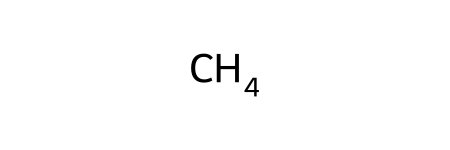

In [10]:
mols_list[0]

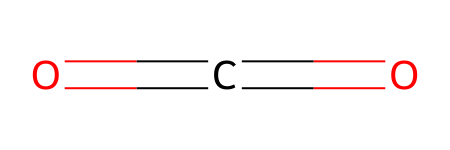

In [11]:
mols_list[1]

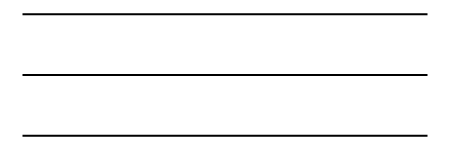

In [12]:
mols_list[2]

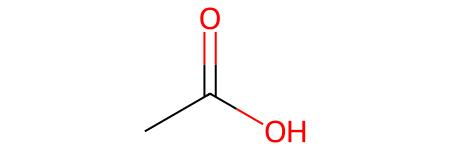

In [13]:
mols_list[3]

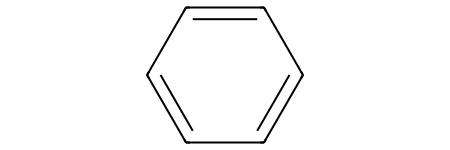

In [14]:
mols_list[4]

Zadanie 2

Teraz wyświetlmy poszczególne atomy, z których składają się związki powyżej

In [ ]:
def print_atom_info(mol):
    for atom in mol.GetAtoms():
        # TODO: Wyświetl symbole atomów wchodzących w skład podanej molekuł
        print(atom.GetSymbol())

IndentationError: expected an indented block after 'for' statement on line 2 (3139017429.py, line 4)

In [ ]:
for mol in mols_list:
    print_atom_info(mol)

Zadanie 3

Wyświetlmy rodzaje wiązań, które występują między atomami w związkach powyżej.

In [ ]:
def print_bond_info(mol):
    for bond in mol.GetBonds():
        # TODO: Wyświetl symbole atomów wchodzących w skład podanej molekuł
        begin_atom = bond.GetBeginAtom()
        end_atom = bond.GetEndAtom()
        print(
            begin_atom.GetSymbol(),
            end_atom.GetSymbol(),
            f"{bond.GetBondType()}",
        )

In [ ]:
for mol in mols_list:
    print_bond_info(mol)

Zadanie 4

Wyświetlmy informacje o ilości pierścieni w cząsteczce benzenu.

In [ ]:
def get_ring_count(mol) -> int:
    # TODO: Pobierz i zwróc informację o pierścieniach w cząsteczce
    ring_info = mol.GetRingInfo()
    
    return ring_info.NumRings()

In [ ]:
benzene_ring_count = get_ring_count()
print(benzene_ring_count)

In [ ]:
assert benzene_ring_count == 1

W ten sposób możemy pozyskać proste deskryptory. Istnieje jednak o wiele więcej czynników, które przesądzają o właściwościach cząsteczki.

Deskryptory molekularne są kluczowe dla chemoinformatyki, za ich pomocą możemy na przykład filtrować zbiory danych w poszukiwaniu cząsteczek o interesujących właściwościach.

W celu obliczenia interesująćych nas wartości moglibyśmy ręcznie wykonywać operacje na obiektach reprezentujących cząsteczki. Na szczęście mamy warstwę abstrakcji, która ułatwi nam zadanie: 

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html

In [1]:
from rdkit.Chem import rdMolDescriptors

Zadanie 5

Spróbujmy utworzyć dwa filtry molekularne, znane jako **Rule of Veber** i **Oprea**.

https://pubmed.ncbi.nlm.nih.gov/12036371/

https://pubmed.ncbi.nlm.nih.gov/10756480/

Rule of Veber wymaga zdefiniowania dwóch deskryptorów:
- Ilości wiązań rotacyjnych (rotatble bonds),
- Topological polar surface area (TPSA) https://en.wikipedia.org/wiki/Polar_surface_area,

Rule of Oprea wymaga czterech deskryptorów:
- Ilości dawców wiązań wodorowych (HBD), 
- Ilości akceptorów wiązań wodorowych (HBA), 
https://www.researchgate.net/figure/Hydrogen-bond-donor-HBD-and-hydrogen-bond-acceptor-HBA-sites-for-trizaole-Tz-left_fig5_346474495
- Ilości wiązań rotacyjnych,
- Ilości pierścieni

W razie problemów można zajrzeć do repozytorium biblioteki **scikit-fingerprints**, która implementuje te i wiele innych filtrów.

https://github.com/scikit-fingerprints/scikit-fingerprints/tree/master

W ramach zadania przygotujemy znaczenie uproszczoną implementację, która pozwoli przedstawić regułę działania filtrów.

In [20]:
def would_pass_veber_rule(mol) -> bool:
    # TODO
    rules: list[bool] = [
        rdMolDescriptors.CalcNumRotatableBonds(mol) <= 10, # Ilość wiązań rotacyjnych TODO
        rdMolDescriptors.CalcTPSA(mol) <= 140 # TPSA TODO
    ]

    if not all(rules):
        return False
    else:
        return True


def would_pass_oprea_filter(mol) -> bool:
    # TODO
    rules: list[bool] = [
        0 <= rdMolDescriptors.CalcNumHBD(mol) <= 2, # HBD TODO
        2 <= rdMolDescriptors.CalcNumHBA(mol) <= 9, # HBA TODO
        2 <= rdMolDescriptors.CalcNumRotatableBonds(mol) <= 8, # Ilość wiązań rotacyjnych TODO
        1 <= rdMolDescriptors.CalcNumRings(mol) <= 4, # Ilość pierścieni TODO
    ]

    if not all(rules):
        return False
    else:
        return True

In [ ]:
veber_result: list[bool] = []
smiles_for_veber: list[str] = [
    "[C-]#N",
    "CC=O",
    "CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3NC4=CC(=C(C=C4)OCC5=CC(=CC=C5)F)Cl"
]

for smiles in smiles_for_veber:
    mol_for_veber = MolFromSmiles(smiles)
    veber_result.append(would_pass_veber_rule(mol_for_veber))

assert veber_result == [True, True, False]

Rzeczywiste implementacje często pozwalają na naruszenie jednej z reguł zawartych w filtrze. Spójrzmy na wyniki filtrowania przy pomocy scikit-fingerprints.